# Assignment 5

VADHRI VENKATA RATNAM

11.05.2023

In [112]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import IBMQ, Aer, transpile, execute
from scipy.fft import fft
from math import pi
from qiskit.quantum_info import Statevector
from IPython.display import display, Latex
from qiskit.circuit.library import QFT


# 1. In Grover’s algorithm, how do we flip the sign of the marked element without knowing which element is marked?

The marked element is flipped in sign by the Oracle function. It is also known as phase oracle. 
The oracle is designed to be specific for phase being flipped.

Example #1 
In order to flip the state of 01 state of the complete state of 2 qubits. 

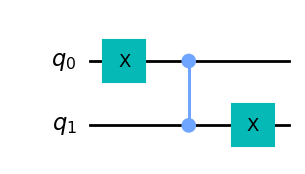

In [113]:
no_of_qubits = 2
no_of_search_space = 2**no_of_qubits

oracle = QuantumCircuit(no_of_qubits, name="oracle")
oracle.x(0)
oracle.cz(0,1)
oracle.x(1)
oracle.to_gate()

oracle.draw(output="mpl")

In [114]:
OracleTest = QuantumCircuit(2, name="OracleTest")
OracleTest.h([0, 1])
OracleTest.append(oracle, [0,1])
state = Statevector(OracleTest)
state.draw(output="latex")

<IPython.core.display.Latex object>

Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


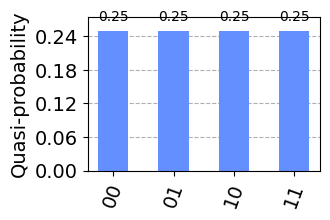

In [115]:
OracleTest.save_statevector()
backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
result = backend.run(transpile(OracleTest, backend), shots=1000).result()
out_state = result.get_statevector()
np.around(out_state, 2)
print(out_state) # Display the output state vector
plot_histogram(result.get_counts(), figsize=(3,2))

# 2. Suppose that there are 32 elements in the search space. 
How many qubits do you need to represent 32 elements? 
(Don’t count any extra qubits, only the ones required to represent the elements). 

$ 2^n = 32 $

$ n = 5 $

# 3. Compute the DFT of (3,4)

DFT transformation matrix for 2x2 is as below.

Transformation matrix = $ \frac{1}{\sqrt2} \begin{bmatrix} 1&1 \\ 1& e^{2.\pi.i/2} \end{bmatrix} = \frac{1}{\sqrt2} \begin{bmatrix} 1&1 \\ 1&-1 \end{bmatrix} $

$ \begin{bmatrix} 3 \\ 4 \end{bmatrix} \frac{1}{\sqrt2} \begin{bmatrix} 1&1 \\ 1&-1 \end{bmatrix} = \frac{1}{\sqrt2} \begin{bmatrix} 7 \\ -1 \end{bmatrix} $

# 4. What happens if we apply DFT/QFT twice. 

To explain in terms of DFT, apply DFT would return the signal to time domain but scaled by a factor. 
Observe the values below for two inputs at even iterations.

In [116]:
tinput = [3,4]

print('DFT input =', tinput )

for i in range(10):
    tinput = fft(tinput)
    print('DFT iter', i+1,' =', tinput )


DFT input = [3, 4]
DFT iter 1  = [ 7.-0.j -1.-0.j]
DFT iter 2  = [6.-0.j 8.+0.j]
DFT iter 3  = [14.+0.j -2.-0.j]
DFT iter 4  = [12.+0.j 16.+0.j]
DFT iter 5  = [28.+0.j -4.+0.j]
DFT iter 6  = [24.+0.j 32.+0.j]
DFT iter 7  = [56.+0.j -8.+0.j]
DFT iter 8  = [48.+0.j 64.+0.j]
DFT iter 9  = [112.+0.j -16.+0.j]
DFT iter 10  = [ 96.+0.j 128.+0.j]


In [117]:
tinput = [4,5]

print('DFT input =', tinput )

for i in range(10):
    tinput = fft(tinput)
    print('DFT iter', i+1,' =', tinput )

DFT input = [4, 5]
DFT iter 1  = [ 9.-0.j -1.-0.j]
DFT iter 2  = [ 8.-0.j 10.+0.j]
DFT iter 3  = [18.+0.j -2.-0.j]
DFT iter 4  = [16.+0.j 20.+0.j]
DFT iter 5  = [36.+0.j -4.+0.j]
DFT iter 6  = [32.+0.j 40.+0.j]
DFT iter 7  = [72.+0.j -8.+0.j]
DFT iter 8  = [64.+0.j 80.+0.j]
DFT iter 9  = [144.+0.j -16.+0.j]
DFT iter 10  = [128.+0.j 160.+0.j]


In case of quantum, after QFT twice the state returns back to compuational basis from entangled stated but will be scaled ( or in this case bitwise operated upon.) For example, the following is for a 4 bit QFT transformation. 

#### QFT iteration  0
$$ |1000\rangle$$
#### QFT iteration  1
$$\frac{1}{4} |0000\rangle- \frac{1}{4} |0001\rangle+\frac{i}{4} |0010\rangle- \frac{i}{4} |0011\rangle+(0.176776695297 + 0.176776695297 i) |0100\rangle+(-0.176776695297 - 0.176776695297 i) |0101\rangle + \ldots +(0.095670858091 - 0.230969883128 i) |1011\rangle+(0.095670858091 + 0.230969883128 i) |1100\rangle+(-0.095670858091 - 0.230969883128 i) |1101\rangle+(-0.230969883128 + 0.095670858091 i) |1110\rangle+(0.230969883128 - 0.095670858091 i) |1111\rangle$$
#### QFT iteration  2
$$ |1111\rangle$$
#### QFT iteration  3
$$\frac{1}{4} |0000\rangle- \frac{1}{4} |0001\rangle- \frac{i}{4} |0010\rangle+\frac{i}{4} |0011\rangle+(0.176776695297 - 0.176776695297 i) |0100\rangle+(-0.176776695297 + 0.176776695297 i) |0101\rangle + \ldots +(0.095670858091 + 0.230969883128 i) |1011\rangle+(0.095670858091 - 0.230969883128 i) |1100\rangle+(-0.095670858091 + 0.230969883128 i) |1101\rangle+(-0.230969883128 - 0.095670858091 i) |1110\rangle+(0.230969883128 + 0.095670858091 i) |1111\rangle$$
#### QFT iteration  4
$$ |1000\rangle$$

# 5. Draw the QFT circuit for three, four and five qubits.
Note that when we have an odd number, there is always one qubit in the middle that does not need to be swapped.

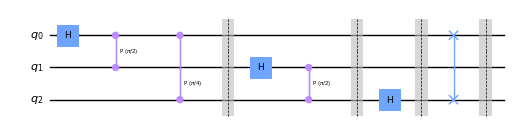

In [118]:
NO_QUBITS = 3

QC = QuantumCircuit(NO_QUBITS)

def myQFT(qc, no_of_Qubits):
    for q in range(0, no_of_Qubits):
        qc.h(q)
        for i in range(q+1, no_of_Qubits):
            qc.cp(pi/(2**(i-q)), i, q)
        qc.barrier()
    for q in range(no_of_Qubits//2):
        qc.swap(q, no_of_Qubits-q-1)
    qc.barrier()
myQFT(QC, NO_QUBITS)
QC.draw(output="mpl", fold= 200, scale = 0.5)

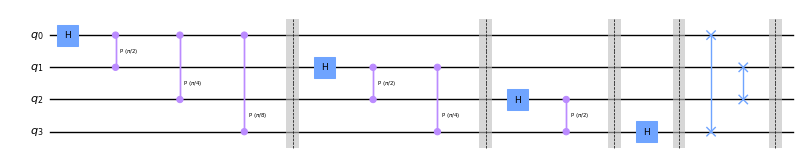

In [119]:
NO_QUBITS = 4

QC = QuantumCircuit(NO_QUBITS)

def myQFT(qc, no_of_Qubits):
    for q in range(0, no_of_Qubits):
        qc.h(q)
        for i in range(q+1, no_of_Qubits):
            qc.cp(pi/(2**(i-q)), i, q)
        qc.barrier()
    for q in range(no_of_Qubits//2):
        qc.swap(q, no_of_Qubits-q-1)
    qc.barrier()
myQFT(QC, NO_QUBITS)
QC.draw(output="mpl", fold= 200, scale = 0.5)

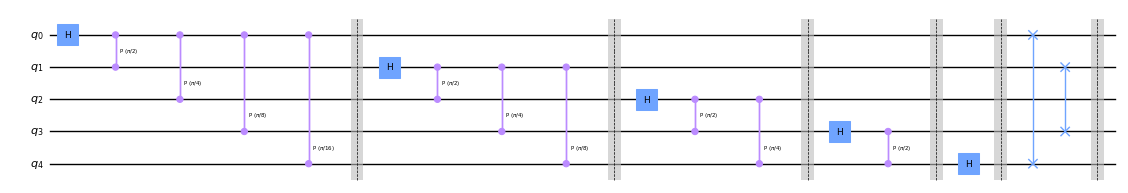

In [120]:
NO_QUBITS = 5

QC = QuantumCircuit(NO_QUBITS)

def myQFT(qc, no_of_Qubits):
    for q in range(0, no_of_Qubits):
        qc.h(q)
        for i in range(q+1, no_of_Qubits):
            qc.cp(pi/(2**(i-q)), i, q)
        qc.barrier()
    for q in range(no_of_Qubits//2):
        qc.swap(q, no_of_Qubits-q-1)
    qc.barrier()
myQFT(QC, NO_QUBITS)
QC.draw(output="mpl", fold= 200, scale = 0.5)

# 6. which states do you expect to observe more frequently?

Assuming that the question relates to QPE, none of the answers are correct. Please see the reasoning below. 

if $ \phi = \frac{3}{16} $, then the decimal notation of that expected is 0.0011 $ \frac{1}{8} + \frac{1}{16} = \frac{3}{16} $ 

For phase rotation, the angle should be inserted into Unitary definition = $ e^{2\pi i \phi} $

Inserting phi, angle rotation =  $ e^{2\pi i \frac{3}{16}} = e^{ \frac{3}{8} \pi i } $

The following code demonstrates the usage of the angle $ 3*pi/8 $

In [121]:
Precision = 3

QREG = QuantumRegister(Precision+1)
CREG = ClassicalRegister(Precision)

QC = QuantumCircuit(QREG, CREG)
QC.x(Precision)
QC.barrier()

angle = 3*pi/8

for i in range(Precision):
    QC.h(i)

for i in range(Precision):
    for t in range(2**(i)):
        QC.cp(angle, Precision-i-1, Precision)

QC.append(QFT(Precision, 0, inverse=True, do_swaps=False), range(Precision) )
state = Statevector(QC)
state.draw(output="latex")

<IPython.core.display.Latex object>

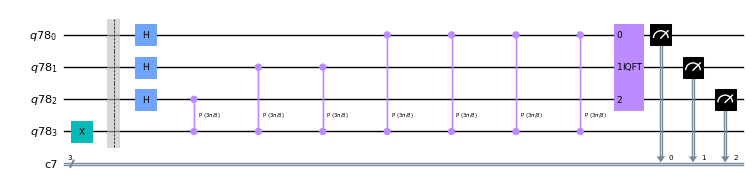

In [122]:
QC.measure(range(Precision),range(Precision))
QC.draw(output="mpl", scale=0.5, fold=1000)

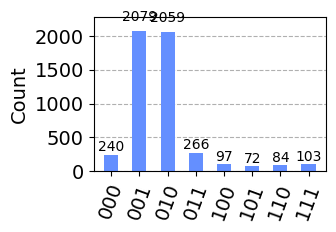

In [123]:
backend = Aer.get_backend('aer_simulator_statevector') 
QC.save_statevector()  
result = backend.run(transpile(QC, backend), shots=5000).result()
out_state = result.get_statevector()
plot_histogram(result.get_counts(), figsize=(3,2))

Normally the circuit simulation would require 4 Qubits for precision. However since we only gave 3 Qubits, we would not be able to get the right precision, however it would be an approximation close the the real value. The small method below would convert a binary representation to decimal. As one can derive, the state1 and state 2 are equidistant and 33% approximate from the original value. 

The rest of the values are further away in the options provided. 

In [124]:
def convertBinaryToDecimal(str):
    str = list(str)
    o = 0 
    multiplication_factor = 2
    while str:
        if int(str.pop(0)): 
            o += 1/multiplication_factor
        multiplication_factor *= 2
    return o

orig = convertBinaryToDecimal("0011")
state1 = convertBinaryToDecimal("001")
state2 = convertBinaryToDecimal("010")

print ("0011 =",orig )
print ("001 =", convertBinaryToDecimal("001"), abs(state1-orig), state1/orig)
print ("010 =", convertBinaryToDecimal("010"), abs(state2-orig), state2/orig)

0011 = 0.1875
001 = 0.125 0.0625 0.6666666666666666
010 = 0.25 0.0625 1.3333333333333333
